In [1]:
import numpy as np
import matplotlib.pyplot as plt
pi=np.pi

In [2]:
def FNmodel(vec, I):
    def dvdt(vec, I):
        return c*(-vec[0]**3/3+vec[0]-vec[1]+I)

    def dwdt(vec):
        return (vec[0]-b*vec[1]+a)/tau

    def dvecdt(vec, I):
        return np.array([dvdt(vec, I), dwdt(vec)])
        
    k1=dvecdt(vec, I)
    k2=dvecdt(vec+dt*k1/2, I)
    k3=dvecdt(vec+dt*k2/2, I)
    k4=dvecdt(vec+dt*k3, I)
    return vec+(k1+2*k2+2*k3+k4)*dt/6

def resultshow(vec):
    for i in range(vec.shape[0]):
        plt.plot(np.arange(vec.shape[1])*dt, vec[i, :])
        
    plt.xlabel('time')
    plt.ylabel('value')
    plt.show()
    
a=0.7
b=0.8
c=10
tau=1
dt=0.001

## Common setting
$$
\begin{align}
a = 0.7 \\
b = 0.8 \\
c = 10 \\
\tau = 1 \\
\Delta t = 0.001
\end{align}
$$

### Simulation 1
- 5 nodes network like hexagon.
- Each nodes get inputs from connected nodes and central system.

$$
\begin{align}
\dot{v} = \ c(-\frac{v^3}{3}+v-w+kI) \\
\dot{w} = \ \frac{v-bv+a}{\tau} \\
I_i = \ \frac{(Av)_i}{(A\sum_{j=1}^N e_j)_i} + 1 + \sin 3t \\
k = 0.1
\end{align}
$$

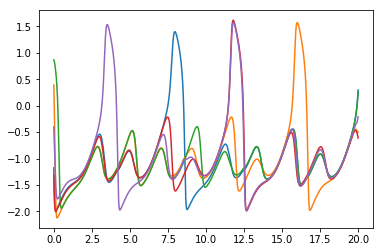

In [3]:
#setting
T=20
N=5
k=0.1
v=(np.random.rand(N)*3-1.5)
w=(np.random.rand(N))*2
network=np.array([
    [0, 1, 0, 0, 1],
    [1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1]
])
for i in range(N):
    network[i, i]=0

#preparation
v=v.reshape(N, 1)
w=w.reshape(N, 1)
temp=np.zeros((2, N))

#simulation
t=0
while t<T:
    out=v[:, -1].copy()
    out[out<0]=0
    out[out>0]=1
    I=np.dot(network, out)/np.sum(network, axis=1)+(1+np.sin(3*t))
    for i in range(N):
        vec=np.array([v[i, -1], w[i, -1]])
        temp[:, i]=FNmodel(vec, k*I[i])
        
    v=np.c_[v, temp[0, :].reshape(N, 1)]
    w=np.c_[w, temp[1, :].reshape(N, 1)]
    t+=dt

for i in range(N):
    plt.plot(np.arange(v.shape[1])*dt, v[i])
    
plt.show()

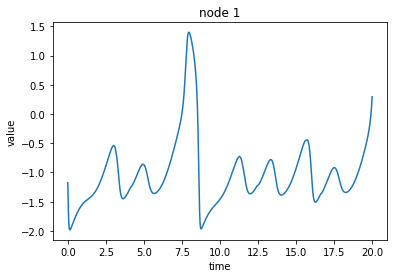

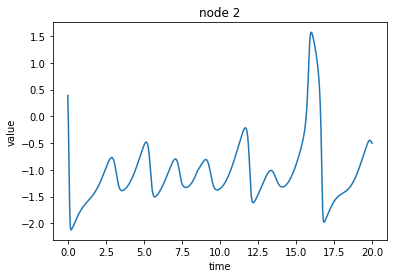

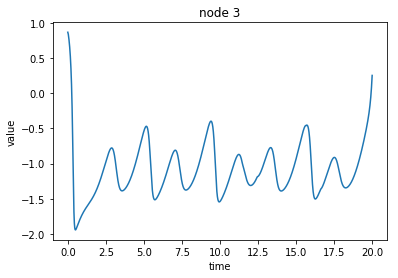

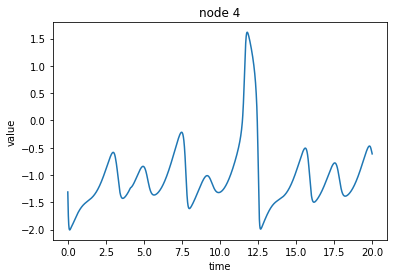

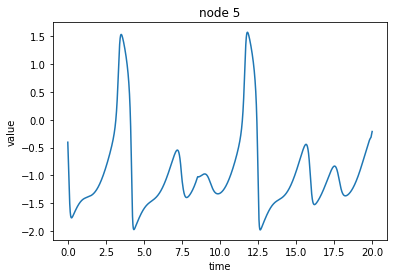

In [4]:
for i in range(5):
    plt.plot(np.arange(v.shape[1])*dt, v[i, :])
    plt.xlabel('time')
    plt.ylabel('value')
    plt.title('node '+str(i+1))
    plt.show()

### Simulation 2
$$
\begin{align}
\dot{v} = \ c(-\frac{v^3}{3}+v-w+kI) \\
\dot{w} = \ \frac{v-bv+a}{\tau} \\
I_i = \ \frac{(Av)_i}{(A\sum_{j=1}^N e_j)_i} + 1 + \sin 6\pi t \\
k = 0.3
\end{align}
$$

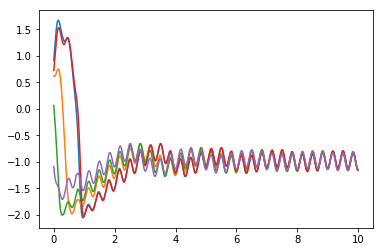

In [5]:
#setting
T=10
N=5
K=0.3
v=(np.random.rand(N)*3-1.5)
w=(np.random.rand(N))*2
network=np.array([
    [0, 1, 0, 0, 1],
    [1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1]
])
for i in range(N):
    network[i, i]=0

#preparation
v=v.reshape(N, 1)
w=w.reshape(N, 1)
temp=np.zeros((2, N))

#simulation
t=0
while t<T:
    out=v[:, -1].copy()
    out[out<0]=0
    out[out>0]=1
    I=np.dot(network, out)/np.sum(network, axis=1)+(1+np.sin(6*pi*t))
    for i in range(N):
        vec=np.array([v[i, -1], w[i, -1]])
        temp[:, i]=FNmodel(vec, K*I[i])
        
    v=np.c_[v, temp[0, :].reshape(N, 1)]
    w=np.c_[w, temp[1, :].reshape(N, 1)]
    t+=dt

for i in range(N):
    plt.plot(np.arange(v.shape[1])*dt, v[i])
    
plt.show()